# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Вторая лабораторная работа </center>
# <center> Анализ сигналов </center>

In [1]:
import librosa
import numpy as np
import scipy
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib

from IPython.display import Audio

# Запретим numpy выполнять деление на 0
np.seterr(divide='raise', invalid='raise')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Определим две функции для отрисовки сигнала.
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)

def draw_sig(frames, name=None, figsize=(14, 3)):
    # Отрисовка сигнала в виде "леденцов на палочке"
    plt.figure(figsize=figsize)
    plt.stem(frames)
    if name is not None:
        plt.legend([name])
    plt.xlabel("n")
    plt.ylabel("Energy")
    plt.show()


Создадим несколько простых сигналов. Они нам понадобятся для дальшейшего тестирования

In [3]:
signals = {}

### Единичный импульс

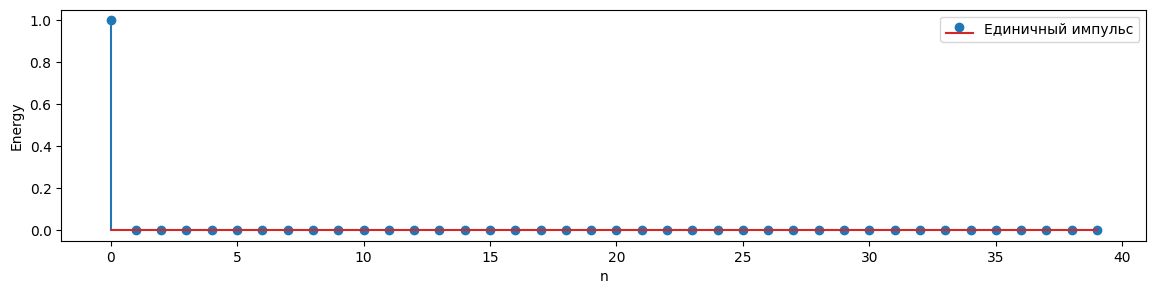

In [4]:
name = "Единичный импульс"
signals[name] = np.array([1] + [0]*39, dtype=float)
draw_sig(signals[name], name)

### Единичный скачок

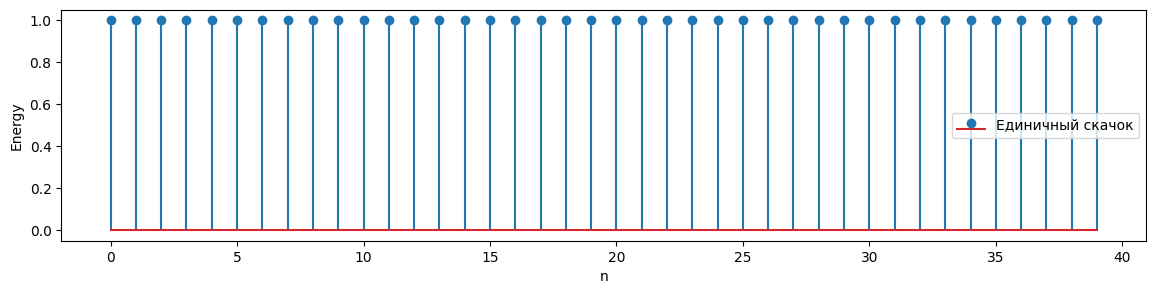

In [5]:
name = "Единичный скачок"
signals[name] = np.array([1]*40 ,dtype=float)
draw_sig(signals[name], name)

### Синус

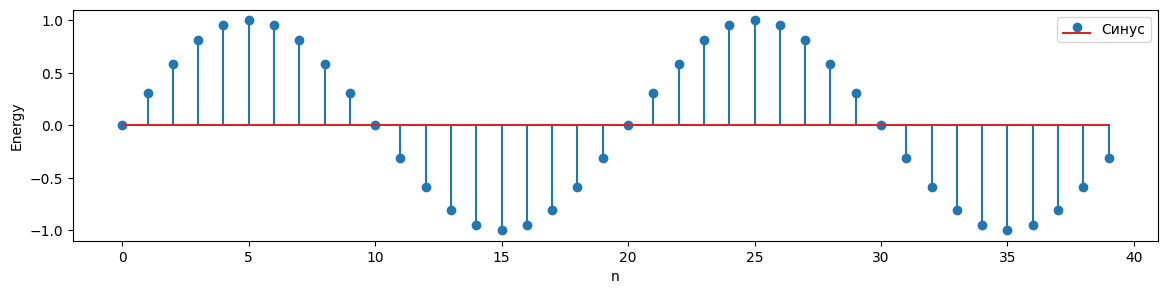

In [6]:
name = "Синус"
signals[name] = np.sin(np.pi * np.arange(40)/10)
draw_sig(signals[name], name)

### Шум

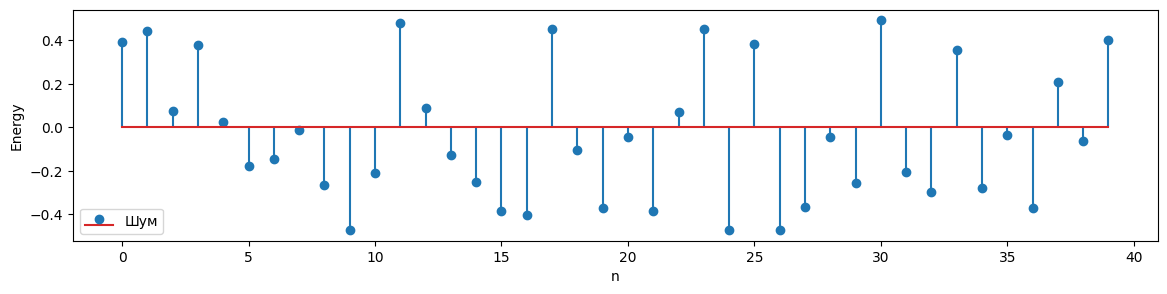

In [7]:
name = "Шум"
signals[name] = np.random.random(40)-0.5
draw_sig(signals[name], name)

-------------------------------
# Преобразование Фурье
Прежде, чем перейти к анализу сигналов, надо разобраться, что такое преобразование Фурье.
> Преобразование Фурье (символ ℱ) — операция, сопоставляющая одной функции вещественной переменной другую функцию вещественной переменной. Эта новая функция описывает коэффициенты («амплитуды») при разложении исходной функции на элементарные составляющие — гармонические колебания с разными частотами (подобно тому, как музыкальный аккорд может быть выражен в виде суммы музыкальных звуков, которые его составляют). [Wiki](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5)



Формула прямого дискретного преобразования Фурье (ДПФ, Discrete Fourier Transform, DFT):
$$ X_k = \sum_{n=0}^{N-1} x_{n} \cdot e^{-i \frac{2\pi}{N} k n} $$


# Задание 1 (2 балла)
Реализовать дискретное преобразование Фурье. Сравнить с реализацией *scipy.fft.fft*

In [8]:
def DFT(x):
  N = len(x)
  X = np.zeros(N, dtype=complex)
  for k in range(N):
    for n in range(N):
      X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
  return X

Сравнение с библиотекой scipy

In [9]:
def test_DTF(x, transform=DFT):
    scipy_result = scipy.fft.fft(x)
    curr_result = transform(x)
    if scipy_result.shape != curr_result.shape:
        print("TEST_FAILED")
        print(f"Your spectrogram shape is {curr_result.shape}. "
              f"Scipy spectrogram shape is {scipy_result.shape}")
        return -1
    if not np.allclose(curr_result, scipy_result):
        print("TEST FAILED")
        print(f"scipy spectrogram: {scipy_result}")
        print(f"Your DTF spectrogram: {curr_result}")
        print(f"Average diff is {np.mean(np.abs(scipy_result - curr_result))}")
        return -2
    print("TEST PASSED")
    return 0

for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig) == 0, "Check you implementation"
print("All ok!")

Checking 'Единичный импульс'
TEST PASSED
Checking 'Единичный скачок'
TEST PASSED
Checking 'Синус'
TEST PASSED
Checking 'Шум'
TEST PASSED
All ok!


Класическое ДПФ имеет существенный недостаток - сложность алгоритма $O(N^2)$. На данный момент существуют чуть более сложные реализации преобразования Фурье, которые избавляются от квадратичной сложности. Например, алгоритм быстрого преобразования Фурье (Fast Fourier Transform, FFT) имеет сложность $O(N log(N))$, что делает его значительно более быстрым на длинных последовательностях.

# Задание 1.1* (1 балл)
Реализовать быстрое преобразование Фурье. Сравнить с scipy.fft.fft

**Подсказка:** учтите, что для БПФ нам нужно, чтобы количество отсчетов сигнала было степенью двойки

In [10]:
def FFT(x):


SyntaxError: incomplete input (ipython-input-1079310802.py, line 1)

In [ ]:
for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig, transform=FFT) == 0, "Check you implementation"
print("All ok!")

Если вы изменяли длительность исходных сигналов, не забудьте вернуть их изначальную длительность

In [ ]:
# YOUR CODE HERE

# Амплитудный и фазовый спектры
Поскольку преобразование Фурье определено в комплекстной области, анализировать результат напрямую проблематично. Для анализа сигналов принято разбивать результат преобразования Фурье на два спектра: амплитудный и фазовый. Амплитудный показывает, как меняется модуль сигнала, а фазовый - как меняется угол, образуемый на комплексной плоскости.
# Задание 2 (1 балл)

Реализовать функции построения амплитудного и фазового спектра

In [11]:
#функция построения амплитудного спектра
def get_amplitude_from_spec(spec):
  X = np.array([])
  for k in spec:
    X = np.append(X, np.abs(k))
  return X

#функция построения фазового спектра
def get_phi_from_spec(spec):
  X = np.array([])
  for k in spec:
    X = np.append(X, np.angle(k))
  return X

In [12]:
def check_mean_var(sig, mean=None, var=None):
    if mean is not None and np.mean(sig) != mean:
        print(f"Bad mean. Expected {mean}, got {np.mean(sig)}")
        return False
    if var is not None and np.var(sig) != var:
        print(f"Bad var. Expected {var}, got {np.var(sig)}")
        return False
    return True

_spec = scipy.fft.fft(np.array([1]+[0]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 0.0), \
    "Wrong Amplitude"
assert check_mean_var(get_phi_from_spec(_spec), 0.0, 0.0), \
    "Wrong Phase"


_spec = scipy.fft.fft(np.array([1]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 9.0), \
    "Wrong  Amplitude"
assert get_amplitude_from_spec(_spec)[0] == 10, \
    "Wrong Amplitude"
assert get_phi_from_spec(_spec)[0] == 0, \
    "Wrong phase"

_spec = scipy.fft.fft(scipy.fft.ifft(np.array([0] + [10+5j]+[0]*6 + [10-5j])))
assert get_amplitude_from_spec(_spec).round(1)[1] == 11.2 , \
    "Wrong Amplitude. Make sure it is a complex number module."
assert get_phi_from_spec(_spec).round(1)[1] == 0.5 , \
    "Wrong Amplitude. Make sure it is an angle."


print("All OK!")

All OK!


Определим еще одну функцию для отрисовки. Теперь будем рисовать сигнал в частотной области

In [237]:
def draw_spec(spec, name=None, draw_A=True, draw_p=True, figsize=(14, 3)):
    if len(spec)<100:
        # Рисуем точки как "леденцы на палочках"
        draw_func = plt.stem
    else:
        # При большом N "леденцы" выглядят плохо,
        # Поэтому будем рисовать огибающую функцию
        draw_func = plt.plot

    if draw_A:
        plt.figure(figsize=figsize)
        plt.title("Amplitude spectrum")
        spec_A = get_amplitude_from_spec(spec)
        draw_func(spec_A)
        plt.xticks(np.arange(0, len(spec_A), 50), rotation=75)
        plt.ylabel("Magnitude")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()

    if draw_p:
        plt.figure(figsize=figsize)
        plt.title("Phase spectrum")
        phi = get_phi_from_spec(spec)
        draw_func(phi)
        plt.ylabel("Radian")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
    return

# Задание 2.1 (0.5 балла)
Постройте спектры для всех сигналов из коллекции signals и ответьте на вопросы:
<!-- 1. Почему амплитуда всех гармоник единичного импульса равна единице?
1. Какие выводы можно сделать смотря на амплитудный спектр? А на фазовый?
1. Как перевести номер отсчета в частоту?  
1. Что в фазовом спектре является полезной информацией, а что - шумом? Почему? -->

### Визуализация:

In [14]:
print(signals.keys())

dict_keys(['Единичный импульс', 'Единичный скачок', 'Синус', 'Шум'])


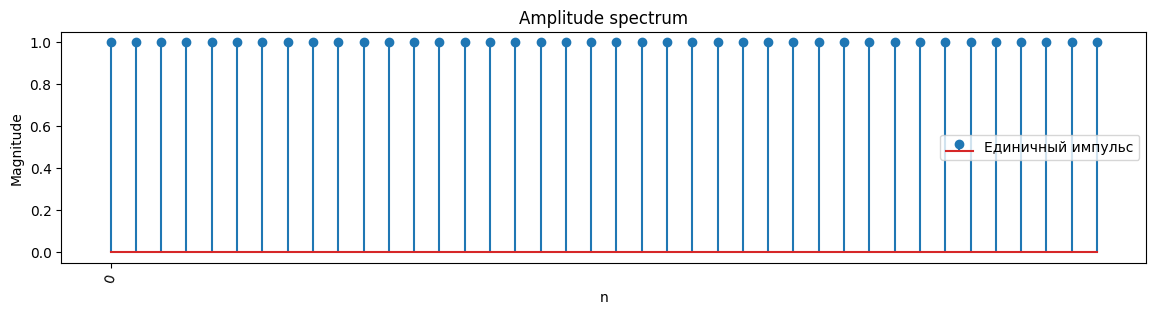

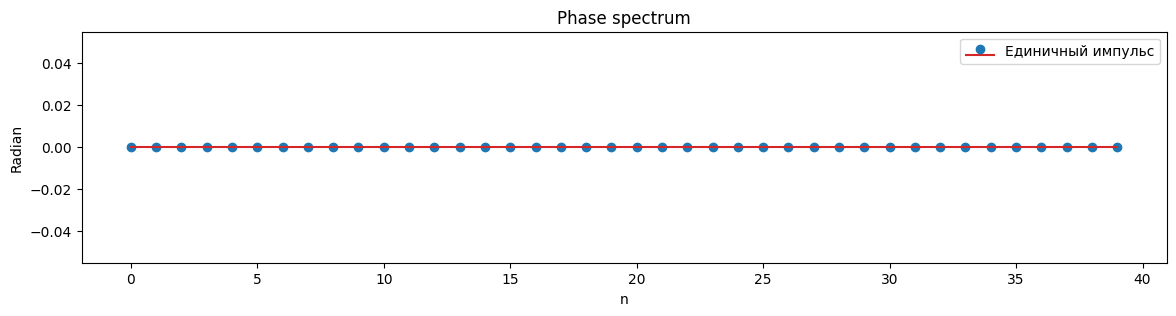

In [15]:
draw_spec(DFT(signals['Единичный импульс']), name = 'Единичный импульс')

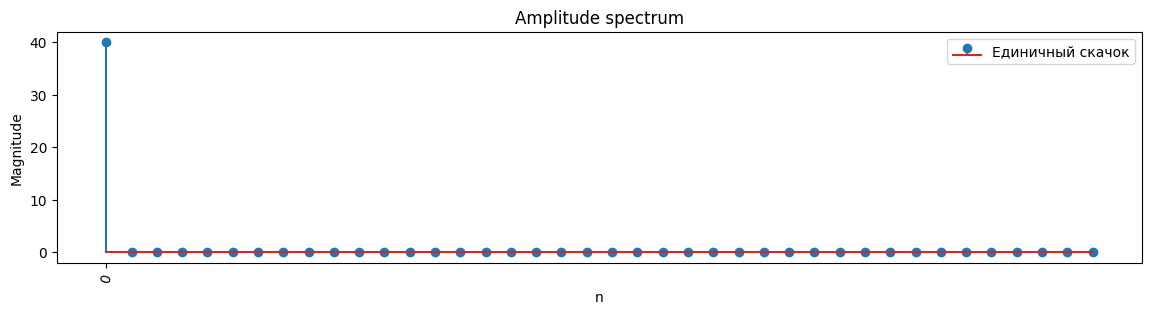

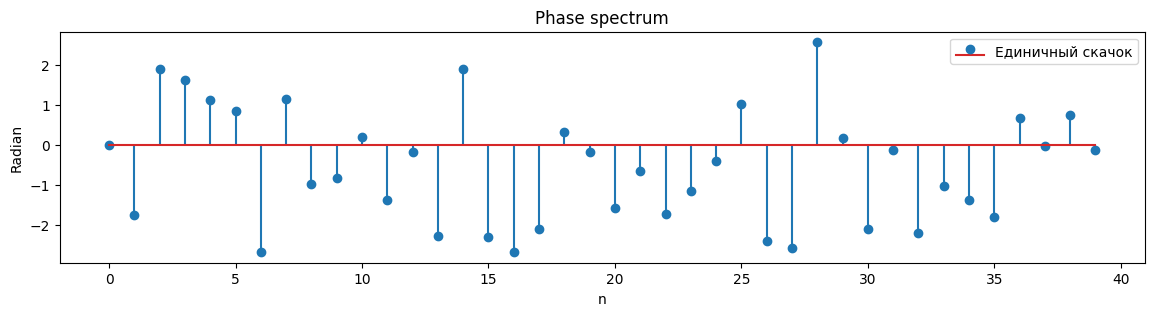

In [16]:
draw_spec(DFT(signals['Единичный скачок']), name = 'Единичный скачок')

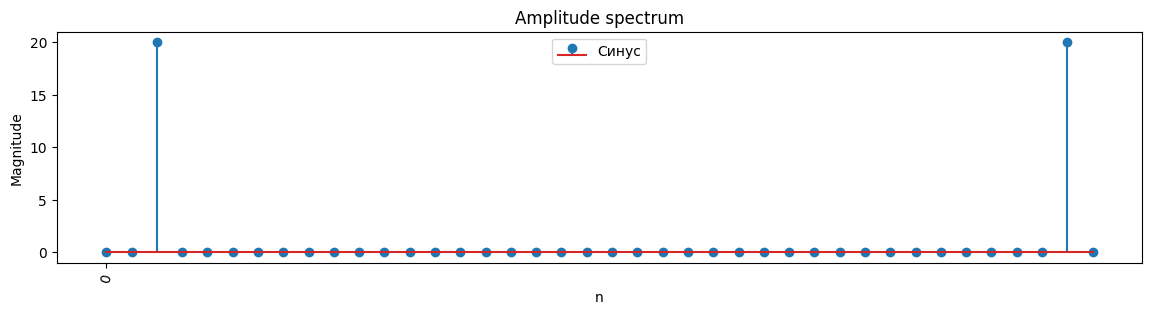

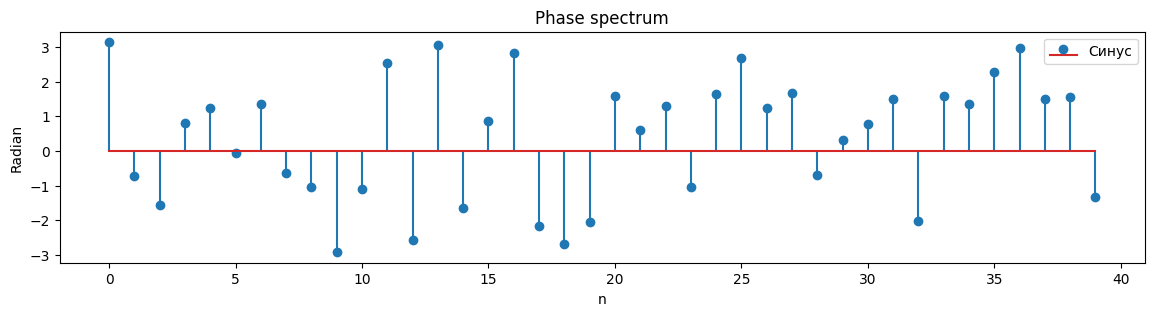

In [17]:
draw_spec(DFT(signals['Синус']), name = 'Синус')

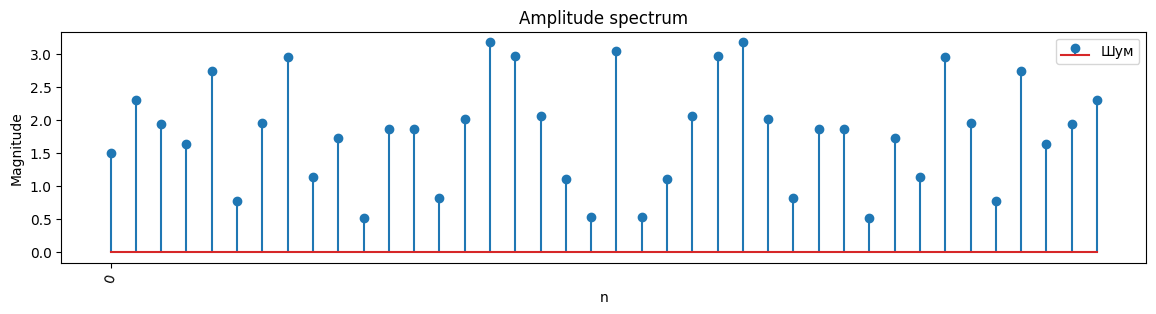

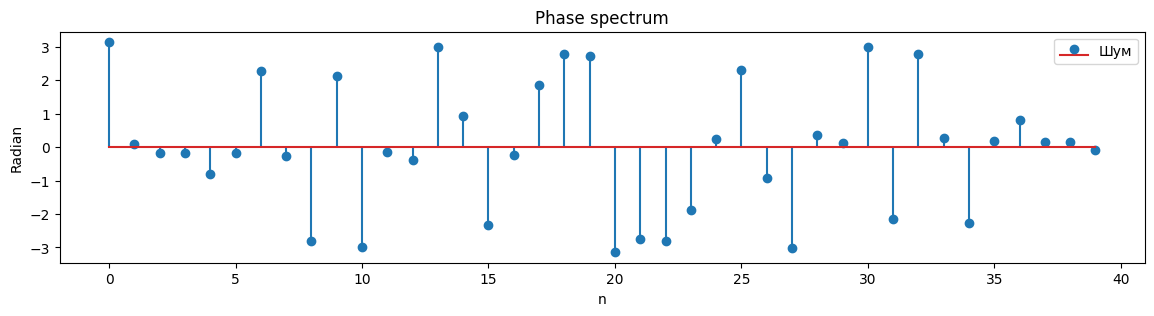

In [18]:
draw_spec(DFT(signals['Шум']), name = 'Шум')

### 1.Почему амплитуда всех гармоник единичного импульса равна константе?

In [19]:
# У импульса все частоты присутствуют в одинаковой степени, потому что в нем нет периодичности.
# Преобразование Фурье пытается разложить весь сигнал на синусоиды, предполагая, что сигнал – периодический.

### 2. Какие выводы можно сделать смотря на амплитудный спектр? А на фазовый?

In [20]:
# Амплитудный спектр показывает, насколько каждая частота выражена в сигнале;
# Фазовый спектр показывает, гдеименно по времени находится эта частота / как частоты расположены во времени;

### 3. Как перевести номер отсчета в частоту?

In [21]:
# = номер отсчета / количество отсчетов * частота дискретизации

### 4. Что в фазовом спектре является полезной информацией, а что - шумом? Почему?

In [22]:
# Полезная информация – это регулярная часть, показывающая, как сдвинуты гармоники, а шум – случайные колебания фазы

# Оконное преобразование Фурье
Преобразование Фурье делает переход из временной области в частотную, позволяя анализировать составляющие сигнал гармоники. Однако это не всегда удобно. В реальных сигналах зачастую составляющие их гармоники изменяются со временем. Например, каждая буква в слове имеет свой набор основных гармоник, и простое преобразование Фурье не сильно поможет нам определить, что было сказано. Для того, чтобы анализировать такие сигналы, обычно используется [Оконное преобразование Фурье](https://ru.wikipedia.org/wiki/Оконное_преобразование_Фурье). Такое преобразование позволяет анализировать гармоники сигнала в коротких промежутках времени и сохранить временную ось при построении спектрограммы.
# Задание 3 (2 балла)
Реализовать оконное преобразование Фурье (Short-time Fourier transform), пользуясь только библиотеками *numpy* и *scipy*. Сравнить с *librosa.stft*


In [23]:
def STFT(x, n_fft=2048, hop_length=512, window='hann'):
  # x - signal
  # n_fft - fft window size
  # hop_length - step size between ffts
  # window - window type. See scipy.signal.get_window
  # return spectrogram
  x = np.asarray(x, dtype=float)
  pad = n_fft // 2
  x_padded = np.pad(x, (pad, pad), mode='constant')
  win = scipy.signal.get_window(window, n_fft, fftbins=True)
  num_frames = 1 + (len(x_padded) - n_fft) // hop_length
  # // 2 по теореме котельникова
  stft_matrix = np.empty((n_fft // 2 + 1, num_frames), dtype=np.complex64)
  for i in range(num_frames):
        start = i * hop_length
        frame = x_padded[start:start + n_fft]
        if len(frame) < n_fft:
            frame = np.pad(frame, (0, n_fft - len(frame)))
        frame = frame * win
        spectrum = np.fft.rfft(frame, n=n_fft)
        stft_matrix[:, i] = spectrum
  return stft_matrix

In [24]:
def test_stft(x, n_fft=2048, hop_length=512, window='hann'):
    librosa_result = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window='hann', center=True)
    result = STFT(x, n_fft=n_fft, hop_length=hop_length, window='hann')
    if librosa_result.shape != result.shape:
        print(f"Your shape {result.shape} != librosa stft shape {librosa_result.shape} ")
        return -1
    if not np.allclose(librosa_result, result):
        print(f"Wrong results. Diff {np.abs(librosa_result-result)}")
        return -2
    return 0

for name, sig in signals.items():
    print(f"Checking '{name}'")
    for n_fft in (8, 4):
        for hop_length in (n_fft//4, n_fft//2):
            assert test_stft(sig, n_fft=n_fft, hop_length=hop_length)==0, \
                f"Test failed. Params n_fft {n_fft}. Hop_length {hop_length}"
    print("ok")
print("All ok!")

Checking 'Единичный импульс'
ok
Checking 'Единичный скачок'
ok
Checking 'Синус'
ok
Checking 'Шум'
ok
All ok!


Определим функцию для отрисовки

In [25]:
# Определим функцию для отрисовки
def draw_stft(X, sr, figsize=(14, 5)):
    plt.figure(figsize=figsize)
    # X - комплекстная спектрограмма
    # Для получения энергии достаточно взять модуль
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.show()

# Анализ сигналов
Теперь можно приступить к анализу звуковых сигналов.
Во время анализа сигналов нам понадобятся все определенные выше инструменты.


----------------------------------
## Анализ паровозного гудка
Начнем с простого сигнала, состоящего из нескольких основных гармоник и шума.

Загрузим аудио файл с паровозным гудком

Len is 82175 ( ). Sample rate is 22050


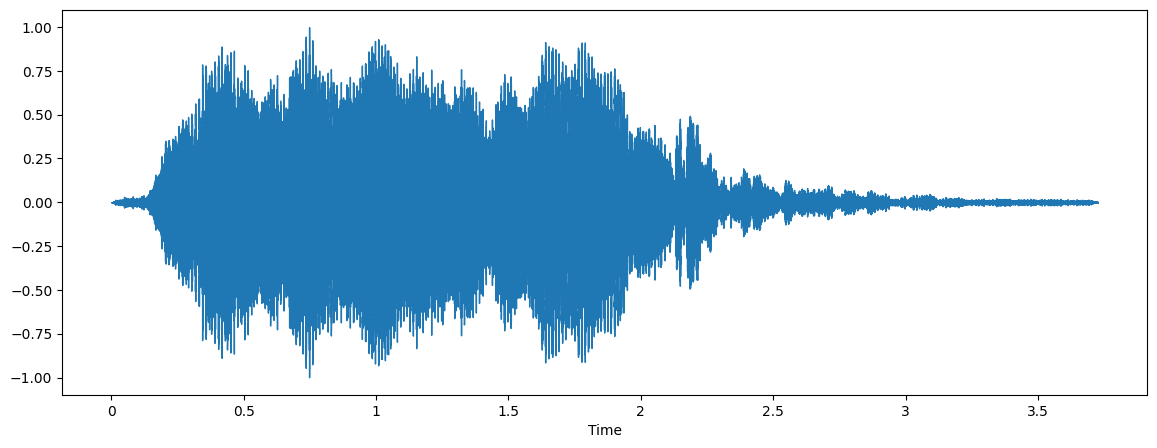

In [127]:
# Загрузим аудио файл с паровозным гудком
train_whistle, tw_sr = librosa.core.load("train_whistle.wav")
print(f"Len is {len(train_whistle)} ( ). Sample rate is {tw_sr}")
player = ipd.Audio(train_whistle, rate=tw_sr)
ipd.display(player)
draw_waveform(train_whistle, sr=tw_sr)

Построим гудок паровоза в частотной области

Гудок паровоза в частотной области


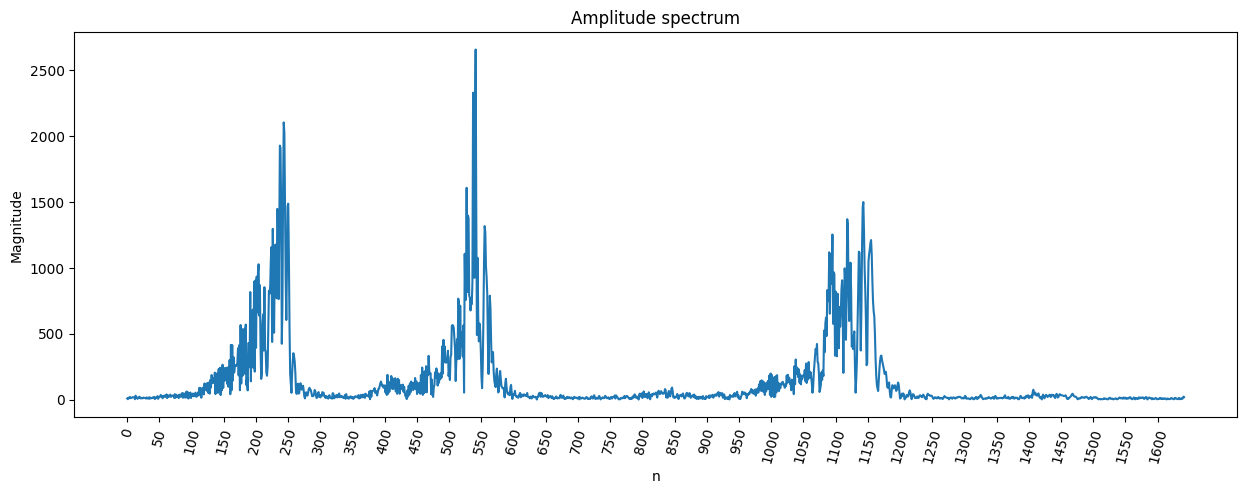

In [357]:
train_whistle_spec = np.fft.fft(train_whistle)
print("Гудок паровоза в частотной области")
draw_spec(train_whistle_spec[len(train_whistle_spec) // 100 * 2:len(train_whistle_spec) // 100 * 4], draw_p=False, figsize=(15,5))

# Задание 4 (2 балла)
Определите 3 основные гармоники паровозного гудка.

Ответ округлите до двух знаков после запятой.


Амплитудный спектр

In [358]:
train_whistle_specA = get_amplitude_from_spec(train_whistle_spec[:len(train_whistle)//2])
peaks, props = scipy.signal.find_peaks(train_whistle_specA, height=np.max(train_whistle_specA)*0.2, distance=100)
freqs = np.linspace(0, tw_sr / 2, len(train_whistle) // 2)

### 1 гармоника

In [359]:
harmonic_one = round(freqs[peaks[0]], 2)
print(harmonic_one)

505.82


### 2 гармоника

In [361]:
harmonic_two = round(freqs[peaks[1]], 2)
print(harmonic_two)

585.79


### 3 гармоника

In [362]:
harmonic_three = round(freqs[peaks[2]], 2)
print(harmonic_three)

747.33


### Тест

In [363]:
# task_answer = [ freq1, freq2, freq3 ]
task_answer = [harmonic_one, harmonic_two, harmonic_three]
print(task_answer)

[np.float64(505.82), np.float64(585.79), np.float64(747.33)]


In [364]:
assert type(task_answer) == list or type(task_answer) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(task_answer)}"
assert len(task_answer) == 3, \
        f"Wrong len {len(task_answer)}."
assert (round(sum(task_answer)) == 1677 and round(np.var(task_answer)) == 1407) or \
        (abs(sum(task_answer)  - 1836) <= 3 and abs(np.var(task_answer) - 10153) <= 181), \
        f"Wrong freqs"
print("Correct!")

Correct!


Теперь попробуйте сгенерировать сигнал, состоящий только из этих гармоник. Воспроизведите сигнал.

In [365]:
dur = 3.0
train_whistle_remade = (librosa.tone(harmonic_one, duration=dur, sr=tw_sr) +
                        librosa.tone(harmonic_two, duration=dur, sr=tw_sr) +
                        librosa.tone(harmonic_three, duration=dur, sr=tw_sr))
player = ipd.Audio(train_whistle_remade, rate=tw_sr)
ipd.display(player)

# Анализ двухтонального многочастотного сигнала
Теперь расмотрим более сложный сигнал - [DTMF](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling). Такие сигналы используются для автоматизации набора телефонного номера.

# Задание 5 (2 балла)
В данном аудио закодирован трехзначный номер. Используя таблицу с [wiki]:(https://ru.wikipedia.org/wiki/DTMF) определите, что за номер закодирован.


Визуализация

Len is 243102. Sample rate is 22050


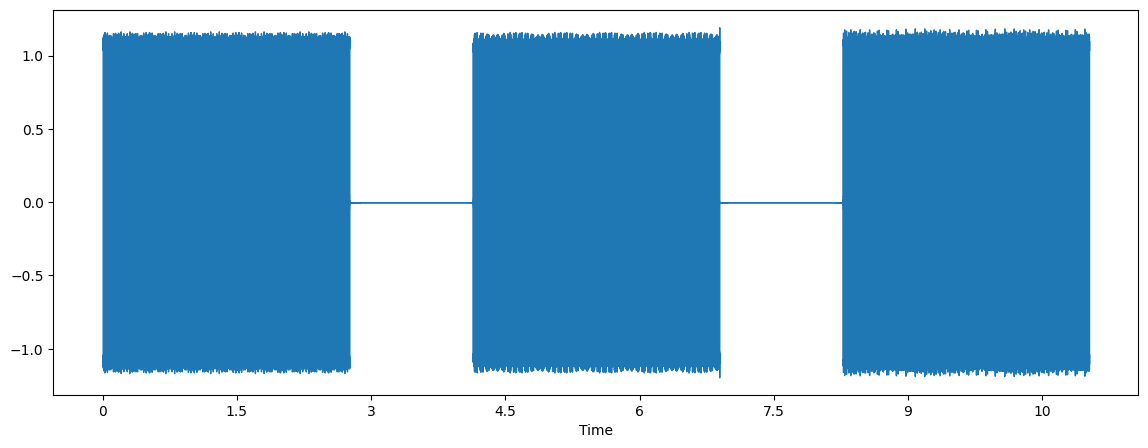

In [366]:
#dtmf.wav
dtmf, dtmf_sr = librosa.core.load("dtmf.wav")
print(f"Len is {len(dtmf)}. Sample rate is {dtmf_sr}")
player = ipd.Audio(dtmf, rate=dtmf_sr)
ipd.display(player)
draw_waveform(dtmf, sr=dtmf_sr)

In [350]:
non_silent = librosa.effects.split(dtmf, top_db=30)
print(len(non_silent))

3


In [367]:
def hz_to_num(freq1, freq2, tol=20):
  low_freqs = {697: 'row1', 770: 'row2', 852: 'row3', 941: 'row4'}
  high_freqs = {1209: 'col1', 1336: 'col2', 1477: 'col3', 1633: 'col4'}
  dtmf_matrix = {
      'row1': {'col1': '1', 'col2': '2', 'col3': '3', 'col4': 'A'},
      'row2': {'col1': '4', 'col2': '5', 'col3': '6', 'col4': 'B'},
      'row3': {'col1': '7', 'col2': '8', 'col3': '9', 'col4': 'C'},
      'row4': {'col1': '*', 'col2': '0', 'col3': '#', 'col4': 'D'},
  }
  row_key = None
  for f, key in low_freqs.items():
      if abs(freq1 - f) < tol:
          row_key = key
          break
  col_key = None
  for f, key in high_freqs.items():
      if abs(freq2 - f) < tol:
          col_key = key
          break

  if row_key is None or col_key is None:
      return None

  return dtmf_matrix[row_key][col_key]

def dtmf_to_number(data, sr):
  spec = np.fft.rfft(data)
  specA = get_amplitude_from_spec(spec)
  freqs = np.fft.rfftfreq(len(data), 1/sr)
  peaks, props = scipy.signal.find_peaks(specA, height=np.max(specA)*0.2, distance=100)
  top2 = freqs[peaks[np.argsort(props["peak_heights"])[-2:]]]
  freq1 = freqs[peaks[0]]
  freq2 = freqs[peaks[1]]
  num = hz_to_num(freq1, freq2)
  return num

### 1 число

In [368]:
start, end = non_silent[0]
segment = dtmf[start:end]
dtmf1 = int(dtmf_to_number(segment, dtmf_sr))
dtmf1

1

### 2 число

In [369]:
start, end = non_silent[1]
segment = dtmf[start:end]
dtmf2 = int(dtmf_to_number(segment, dtmf_sr))
dtmf2

5

### 3 число

In [370]:
start, end = non_silent[2]
segment = dtmf[start:end]
dtmf3 = int(dtmf_to_number(segment, dtmf_sr))
dtmf3

9

### Тест

In [371]:
phone_number = [dtmf1, dtmf2, dtmf3]

In [372]:
assert type(phone_number) == list or type(phone_number) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(phone_number)}"
assert len(phone_number) == 3, \
        f"Wrong len {len(phone_number)}."
assert round(np.mean(phone_number)) == 5 and round(np.var(phone_number)) == 11 , \
        f"Wrong number"
assert hashlib.md5(''.join(map(str, phone_number)).encode()).hexdigest() == "140f6969d5213fd0ece03148e62e461e", \
        f"Wrong hash. How did you pass mean/var test?"
print("Correct!")

Correct!
